In [7]:
cd ..

/home/tommy/Scrivania/Polimi/Honours Programme


In [13]:
from games.goofspiel import build_goofspiel_tree, TieSolver
from data_structures.cfr_trees import CFRTree
from cfr_code.sample_cfr import SolveWithSampleCFR
from utilities.graphs import graphs_from_cfr_results, epsilon_graph

In [9]:
goofspiel_tree = build_goofspiel_tree(2, 3, TieSolver.Accumulate)

In [10]:
cfr_tree = CFRTree(goofspiel_tree)

In [11]:
%time res = SolveWithSampleCFR(cfr_tree, iterations = 100, bootstrap_iterations = 0, \
                               show_perc = True, perc = 10, checkEveryIteration = 1)

10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
100.0%
CPU times: user 8.48 s, sys: 0 ns, total: 8.48 s
Wall time: 8.47 s


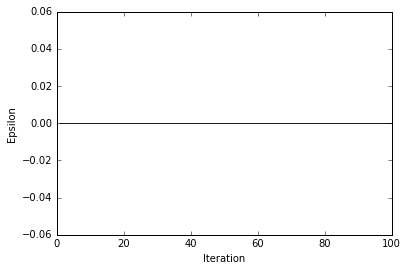

In [14]:
epsilon_graph(res)

In [ ]:
cfr_tree2 = CFRTree(goofspiel_tree)
%time res2 = SolveWithSampleCFR(cfr_tree2, iterations = 10000, bootstrap_iterations = 1000, \
                               show_perc = True, perc = 10, checkEveryIteration = 1000, bound_joint_size = False)

In [ ]:
graphs_from_cfr_results(res2)